Data taking from Physics 391 Lab 3 Photoelectric effect

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os            ##  This module is for "operating system" interfaces
import sys           ##  This module is for functionality relevant to the python run time

GOOGLE_PATH_AFTER_MYDRIVE = 'third semester/M hackers'
GOOGLE_DRIVE_PATH = os.path.join('drive','My Drive', GOOGLE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Append the directory path of this notebook to what python easily "sees"
sys.path.append(GOOGLE_DRIVE_PATH)

# Make your current working directory the directory path of this notebookand data 

os.chdir(GOOGLE_DRIVE_PATH) 

['panda numpy.ipynb', 'Project 1.0.gslides', 'Assi.gdoc', 'classification.ipynb', 'Copy of violet.gsheet', 'data']


**We wish to import the libraries**

In [ ]:
import numpy as np                         # np is the alias we can now use to access any tool in numpy
from matplotlib import pyplot as plt       # here, we only need the pyplot module from the library (with alias plt)
import pandas as pd
import scipy.optimize as opt               # this is needed for chi-squared minimization

**We want to read in Violet.csv**



In [ ]:
pd.read_csv('data/violet.csv')

,V_cathode,V_anode (d=0) [mV],V_anode (d=0.3)
0,0.1,-52.563,-19.9820
1,0.2,-47.372,-18.0170
2,0.3,-41.547,-15.7900
3,0.4,-35.122,-13.3480
4,0.5,-28.828,-10.8510
5,0.6,-22.795,-8.5270
6,0.7,17.164,-6.3650
7,0.8,-11.949,-4.3930
8,0.9,-7.417,-2.7080
9,1.0,-3.840,-1.4001


**We wish to change to colmns of Violet,  firstly, change the read in input of the datas to under 2 for V_cathode. How do we do all these if we have messy data?**

In [ ]:
all = pd.read_csv('data/Data - Sheet1.csv')

In [ ]:
Violet = -1*pd.read_csv('data/Data - Sheet1.csv',header = None, usecols=[8,9,10], skiprows = 2, nrows=(24), names =['V_cathode','V_anode (d=0)','V_anode (d=0.3)'])

In [ ]:
Violet['V_cathode']

0    -0.1
1    -0.2
2    -0.3
3    -0.4
4    -0.5
5    -0.6
6    -0.7
7    -0.8
8    -0.9
9    -1.0
10   -1.1
11   -1.2
12   -1.3
13   -1.4
14   -1.5
15   -1.6
16   -1.7
17   -1.8
18   -1.9
19   -2.0
20   -2.1
21   -2.2
22   -2.3
23   -2.4
Name: V_cathode, dtype: float64

**We wish to visualize the data**

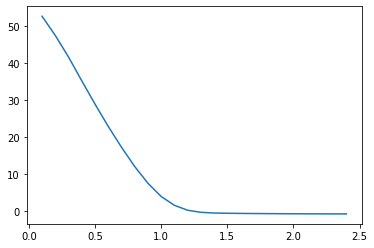

In [ ]:
Violet['V_cathode'] = -Violet['V_cathode']
plt.plot(Violet['V_cathode'],Violet['V_anode (d=0)'])

**What should the labels be? y vs x**

No handles with labels found to put in legend.


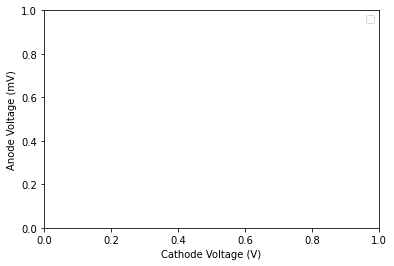

In [ ]:
plt.xlabel('Cathode Voltage (V)')
plt.ylabel('Anode Voltage (mV)')
plt.legend()

**Now, together**

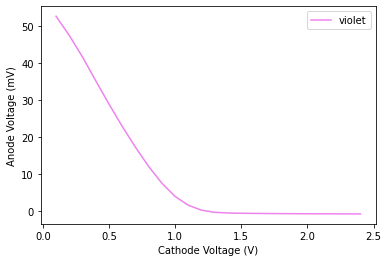

In [ ]:
plt.plot(Violet['V_cathode'],Violet['V_anode (d=0)'], color ="violet",label = 'violet')
plt.xlabel('Cathode Voltage (V)')
plt.ylabel('Anode Voltage (mV)')
plt.legend()

In [ ]:
Violet['V_cathode']

0     0.1
1     0.2
2     0.3
3     0.4
4     0.5
5     0.6
6     0.7
7     0.8
8     0.9
9     1.0
10    1.1
11    1.2
12    1.3
13    1.4
14    1.5
15    1.6
16    1.7
17    1.8
18    1.9
19    2.0
20    2.1
21    2.2
22    2.3
23    2.4
Name: V_cathode, dtype: float64

In [ ]:
np_array = Violet['V_cathode'].to_numpy()
np_array

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [ ]:
sum = np.sum(Violet['V_cathode'])
sum

30.000000000000004

In [ ]:
sum = np.sum(np_array)
sum

30.000000000000004

In [ ]:
sin = np.sin(Violet['V_cathode'])
sin

0     0.099833
1     0.198669
2     0.295520
3     0.389418
4     0.479426
5     0.564642
6     0.644218
7     0.717356
8     0.783327
9     0.841471
10    0.891207
11    0.932039
12    0.963558
13    0.985450
14    0.997495
15    0.999574
16    0.991665
17    0.973848
18    0.946300
19    0.909297
20    0.863209
21    0.808496
22    0.745705
23    0.675463
Name: V_cathode, dtype: float64

In [ ]:
sin = np.sin(np_array)
sin

array([0.09983342, 0.19866933, 0.29552021, 0.38941834, 0.47942554,
       0.56464247, 0.64421769, 0.71735609, 0.78332691, 0.84147098,
       0.89120736, 0.93203909, 0.96355819, 0.98544973, 0.99749499,
       0.9995736 , 0.99166481, 0.97384763, 0.94630009, 0.90929743,
       0.86320937, 0.8084964 , 0.74570521, 0.67546318])

**Now, you have an numpy array or panda data frame, what can you do with it? what is training?**

**How is data fitting related to ML? How is fitting a model similiar to prediction? How is it different than fitting a equation to this set of data?**

In [ ]:
def calculate_theta(x) :
  '''
  Input:
  x (array-like): Input values for heaviside step function

  Output:
  outputs (float) : 0 or 1 depending on input relative to threshold
  '''

  return np.heaviside(x,1)

In [ ]:
def photo_current_model(v_cathode, a, b, c, v_stop, plot=True) :
  ''' Model function to fit to for current, eqn. 2
  Input:
  v_cathode (array-like): Model independent values
  a (float): parameter to fit
  b (float): parameter to fit
  c (float): parameter to fit
  v_stop (float): parameter to fit, stopping voltage
  '''
  first_part = a*((v_stop - v_cathode)**3) * (calculate_theta(v_stop - v_cathode))
  second_part = b*((v_stop - v_cathode)**4) * (calculate_theta(v_stop - v_cathode))
  third_part = 1 + (c*(v_stop - v_cathode)**2) * (calculate_theta(v_stop - v_cathode))
  iphoto = (first_part + second_part)/(third_part)
  return iphoto

In [ ]:
def plot_iteration_of_fit(v_anode, v_cathode, v_fit, a, b, c,) :
  ''' Plot to visualize fit as it happens
  Input:
  v_anode (array-like): Measured v_anode
  v_cathode (array-like): Measured v_cathode
  v_fit (array-like): Results of fit at some given iteration
  '''
  plt.scatter(v_cathode, v_anode, label='Data for no filter')
  plt.plot(v_cathode, v_fit, label='Fit: a=%.2f,b=%.2f,c=%.2f'%(a,b,c))

  plt.xlabel("Cathode potential in voltage")
  plt.ylabel("Anode potential in voltage")
  plt.legend()
  plt.show()

In [ ]:
best_guess = np.array([1,0.9,0.9,0.38]) # for a, b, c, v_stop
params, params_covariance = opt.curve_fit(photo_current_model, Violet['V_cathode'], Violet['V_anode (d=0)'], p0 = best_guess)
fit_errors = np.sqrt(np.diag(params_covariance))
params1 = params

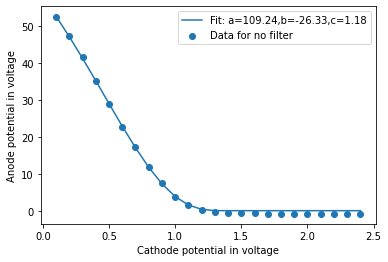

In [ ]:
fit1 = photo_current_model(Violet['V_cathode'],params1[-4],params1[-3],params1[-2],params1[-1],plot=True)
plot_iteration_of_fit(Violet['V_anode (d=0)'],Violet['V_cathode'], fit1,params1[-4],params1[-3],params1[-2])